<Axes: >

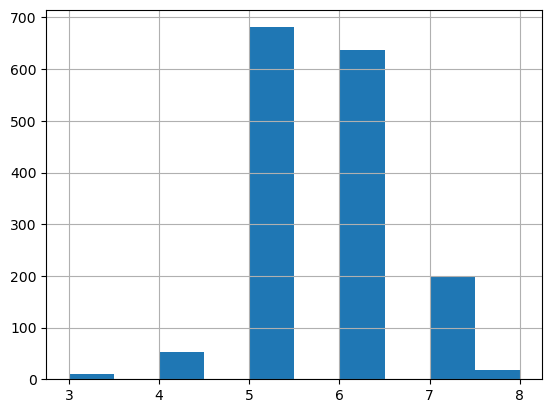

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from statsmodels.miscmodels.ordinal_model import OrderedModel
import numpy as np


wine = pd.read_csv("winequality-red.csv")
wine['quality'].hist()

In [2]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   int64  
 6   total sulfur dioxide  1599 non-null   int64  
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 150.0 KB


In [4]:
wine["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.875547,46.468418,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460434,32.895920,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


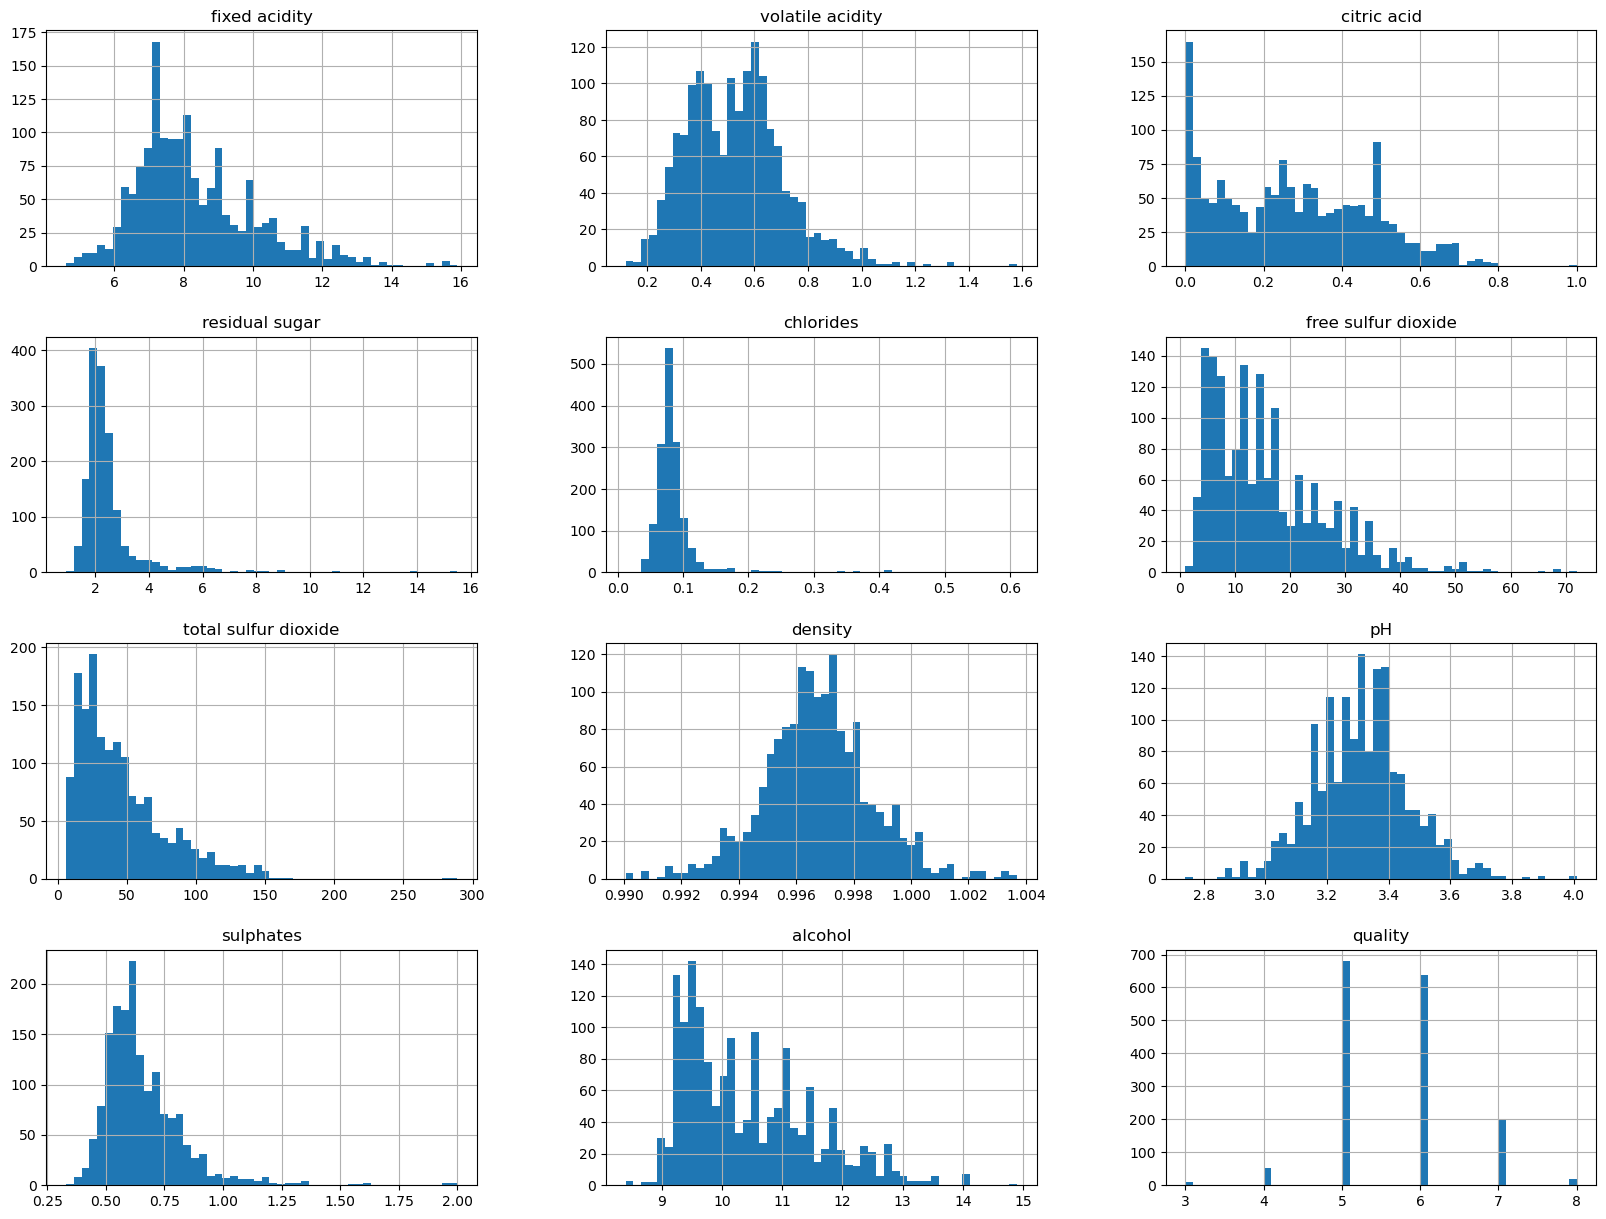

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
wine.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
sample = wine.sample(n=5, random_state=123)

In [8]:
sample

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
912,10.0,0.46,0.44,2.9,0.065,4,8,0.99674,3.33,0.62,12.2,6
772,9.5,0.57,0.27,2.3,0.082,23,144,0.99782,3.27,0.55,9.4,5
1037,7.3,0.91,0.10,1.8,0.074,20,56,0.99672,3.35,0.56,9.2,5
1106,8.2,0.23,0.42,1.9,0.069,9,17,0.99376,3.21,0.54,12.3,6
263,7.9,0.37,0.23,1.8,0.077,23,49,0.99630,3.28,0.67,9.3,5


In [9]:
corr_matrix = wine.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050554
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185112
volatile acidity       -0.390558
Name: quality, dtype: float64

In [10]:
# Split the data into training and testing sets
X = wine.drop('quality', axis=1)
y = wine['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sample_X = sample.drop('quality', axis=1)
sample_y = sample['quality']

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

sample_X_test = scaler.transform(sample_X)
print("Before Over Sampling, count of the label '8': {}".format(sum(y_train == 8)))  
print("Before Over Sampling, count of the label '7': {}".format(sum(y_train == 7)))  
print("Before Over Sampling, count of the label '6': {}".format(sum(y_train == 6)))  
print("Before Over Sampling, count of the label '5': {}".format(sum(y_train == 5)))  
print("Before Over Sampling, count of the label '4': {}".format(sum(y_train == 4)))  
print("Before Over Sampling, count of the label '3': {} \n".format(sum(y_train == 3)))  
from imblearn.over_sampling import SMOTE 
strategy = {3:20, 4:100, 5:551, 6:551, 7:200, 8:90}
sm1 = SMOTE(sampling_strategy=strategy)  
X_train_res, y_train_res = sm1.fit_resample(X_train, y_train.ravel())  
print('After Over Sampling, the shape of the train_X: {}'.format(X_train_res.shape))  
print('After Over Sampling, the shape of the train_y: {} \n'.format(y_train_res.shape))
print("After Over Sampling, count of the label '8': {}".format(sum(y_train_res == 8))) 
print("After Over Sampling, count of the label '7': {}".format(sum(y_train_res == 7))) 
print("After Over Sampling, count of the label '6': {}".format(sum(y_train_res == 6))) 
print("After Over Sampling, count of the label '5': {}".format(sum(y_train_res == 5))) 
print("After Over Sampling, count of the label '4': {}".format(sum(y_train_res == 4)))  
print("After Over Sampling, count of the label '3': {}".format(sum(y_train_res == 3))) 

Before Over Sampling, count of the label '8': 13
Before Over Sampling, count of the label '7': 157
Before Over Sampling, count of the label '6': 506
Before Over Sampling, count of the label '5': 551
Before Over Sampling, count of the label '4': 43
Before Over Sampling, count of the label '3': 9 

After Over Sampling, the shape of the train_X: (1512, 11)
After Over Sampling, the shape of the train_y: (1512,) 

After Over Sampling, count of the label '8': 90
After Over Sampling, count of the label '7': 200
After Over Sampling, count of the label '6': 551
After Over Sampling, count of the label '5': 551
After Over Sampling, count of the label '4': 100
After Over Sampling, count of the label '3': 20


In [11]:
# Fit a multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
accuracy1 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy1)
print('Confusion Matrix:\n', conf_matrix)
print(classification_report(y_test, y_pred))

Accuracy: 0.575
Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  1  7  2  0  0]
 [ 0  0 98 32  0  0]
 [ 0  0 46 76 10  0]
 [ 0  0  3 30  9  0]
 [ 0  0  0  1  4  0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.10      0.18        10
           5       0.63      0.75      0.69       130
           6       0.54      0.58      0.56       132
           7       0.39      0.21      0.28        42
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.43      0.27      0.28       320
weighted avg       0.56      0.57      0.55       320



C:\Users\kyuta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kyuta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kyuta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
# Fit a multinomial logistic regression model
skl_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
skl_model.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = skl_model.predict(X_test)

# Evaluate the performance of the model
accuracy1 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy1)
print('Confusion Matrix:\n', conf_matrix)
print(classification_report(y_test, y_pred))

Accuracy: 0.55625
Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  2  6  2  0  0]
 [ 0  1 93 34  1  1]
 [ 1  2 43 70 13  3]
 [ 0  0  3 25 11  3]
 [ 0  0  0  1  2  2]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.40      0.20      0.27        10
           5       0.64      0.72      0.67       130
           6       0.53      0.53      0.53       132
           7       0.41      0.26      0.32        42
           8       0.22      0.40      0.29         5

    accuracy                           0.56       320
   macro avg       0.37      0.35      0.35       320
weighted avg       0.55      0.56      0.55       320



C:\Users\kyuta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# Fit a multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='newton-cg')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print(classification_report(y_test, y_pred))

Accuracy: 0.575
Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  1  7  2  0  0]
 [ 0  0 98 32  0  0]
 [ 0  0 46 76 10  0]
 [ 0  0  3 30  9  0]
 [ 0  0  0  1  4  0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.10      0.18        10
           5       0.63      0.75      0.69       130
           6       0.54      0.58      0.56       132
           7       0.39      0.21      0.28        42
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.43      0.27      0.28       320
weighted avg       0.56      0.57      0.55       320



C:\Users\kyuta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kyuta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kyuta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
# Fit a multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='newton-cg')
model.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print(classification_report(y_test, y_pred))

Accuracy: 0.55625
Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  2  6  2  0  0]
 [ 0  1 93 34  1  1]
 [ 1  2 43 70 13  3]
 [ 0  0  3 25 11  3]
 [ 0  0  0  1  2  2]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.40      0.20      0.27        10
           5       0.64      0.72      0.67       130
           6       0.53      0.53      0.53       132
           7       0.41      0.26      0.32        42
           8       0.22      0.40      0.29         5

    accuracy                           0.56       320
   macro avg       0.37      0.35      0.35       320
weighted avg       0.55      0.56      0.55       320



In [15]:
# Fit an multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=5006)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print(classification_report(y_test, y_pred))

Accuracy: 0.575
Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  1  7  2  0  0]
 [ 0  0 98 32  0  0]
 [ 0  0 46 76 10  0]
 [ 0  0  3 30  9  0]
 [ 0  0  0  1  4  0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.10      0.18        10
           5       0.63      0.75      0.69       130
           6       0.54      0.58      0.56       132
           7       0.39      0.21      0.28        42
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.43      0.27      0.28       320
weighted avg       0.56      0.57      0.55       320



C:\Users\kyuta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kyuta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kyuta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
# Fit an multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=5006)
model.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print(classification_report(y_test, y_pred))

Accuracy: 0.55625
Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  2  6  2  0  0]
 [ 0  1 93 34  1  1]
 [ 1  2 43 70 13  3]
 [ 0  0  3 25 11  3]
 [ 0  0  0  1  2  2]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.40      0.20      0.27        10
           5       0.64      0.72      0.67       130
           6       0.53      0.53      0.53       132
           7       0.41      0.26      0.32        42
           8       0.22      0.40      0.29         5

    accuracy                           0.56       320
   macro avg       0.37      0.35      0.35       320
weighted avg       0.55      0.56      0.55       320



In [17]:
# Fit a multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='saga')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print(classification_report(y_test, y_pred))

C:\Users\kyuta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.575
Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  1  7  2  0  0]
 [ 0  0 98 32  0  0]
 [ 0  0 46 76 10  0]
 [ 0  0  3 30  9  0]
 [ 0  0  0  1  4  0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.10      0.18        10
           5       0.63      0.75      0.69       130
           6       0.54      0.58      0.56       132
           7       0.39      0.21      0.28        42
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.43      0.27      0.28       320
weighted avg       0.56      0.57      0.55       320



C:\Users\kyuta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kyuta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kyuta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
# Fit a multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='saga')
model.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print(classification_report(y_test, y_pred))

Accuracy: 0.55625
Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  2  6  2  0  0]
 [ 0  1 93 34  1  1]
 [ 1  2 43 70 13  3]
 [ 0  0  3 25 11  3]
 [ 0  0  0  1  2  2]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.40      0.20      0.27        10
           5       0.64      0.72      0.67       130
           6       0.53      0.53      0.53       132
           7       0.41      0.26      0.32        42
           8       0.22      0.40      0.29         5

    accuracy                           0.56       320
   macro avg       0.37      0.35      0.35       320
weighted avg       0.55      0.56      0.55       320



C:\Users\kyuta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [19]:
# Fit a multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='saga', penalty='elasticnet', max_iter = 5006, l1_ratio = 0.2)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print(classification_report(y_test, y_pred))

Accuracy: 0.575
Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  1  7  2  0  0]
 [ 0  0 98 32  0  0]
 [ 0  0 46 76 10  0]
 [ 0  0  3 30  9  0]
 [ 0  0  0  1  4  0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.10      0.18        10
           5       0.63      0.75      0.69       130
           6       0.54      0.58      0.56       132
           7       0.39      0.21      0.28        42
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.43      0.27      0.28       320
weighted avg       0.56      0.57      0.55       320



C:\Users\kyuta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kyuta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kyuta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
# Fit a multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='saga', penalty='elasticnet', max_iter = 5006, l1_ratio = 0.2)
model.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print(classification_report(y_test, y_pred))

Accuracy: 0.55625
Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  2  6  2  0  0]
 [ 0  1 93 34  1  1]
 [ 1  2 43 70 13  3]
 [ 0  0  3 25 11  3]
 [ 0  0  0  1  2  2]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.40      0.20      0.27        10
           5       0.64      0.72      0.67       130
           6       0.53      0.53      0.53       132
           7       0.41      0.26      0.32        42
           8       0.22      0.40      0.29         5

    accuracy                           0.56       320
   macro avg       0.37      0.35      0.35       320
weighted avg       0.55      0.56      0.55       320



In [21]:
# Fit a multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='saga', penalty='l1', max_iter = 5006)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print(classification_report(y_test, y_pred))

Accuracy: 0.575
Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  0  8  2  0  0]
 [ 0  0 98 32  0  0]
 [ 0  0 46 77  9  0]
 [ 0  0  3 30  9  0]
 [ 0  0  0  1  4  0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.63      0.75      0.69       130
           6       0.54      0.58      0.56       132
           7       0.41      0.21      0.28        42
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.26      0.26      0.25       320
weighted avg       0.53      0.57      0.55       320



C:\Users\kyuta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kyuta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kyuta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
# Fit a multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='saga', penalty='l1', max_iter = 5006)
model.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print(classification_report(y_test, y_pred))

Accuracy: 0.5625
Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  2  6  2  0  0]
 [ 0  0 95 33  1  1]
 [ 1  2 43 70 13  3]
 [ 0  0  3 25 11  3]
 [ 0  0  0  1  2  2]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.50      0.20      0.29        10
           5       0.64      0.73      0.68       130
           6       0.53      0.53      0.53       132
           7       0.41      0.26      0.32        42
           8       0.22      0.40      0.29         5

    accuracy                           0.56       320
   macro avg       0.38      0.35      0.35       320
weighted avg       0.55      0.56      0.55       320



In [23]:
# load the data
data = pd.read_csv('winequality-red.csv')

# convert the quality column to an ordered categorical type
data['quality'] = pd.Categorical(data['quality'], categories=[3, 4, 5, 6, 7, 8], ordered=True)

# fit an ordinal logistic regression model using statsmodels
mod_log = OrderedModel(data['quality'],
                        data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']],
                        distr='logit')
res_log = mod_log.fit(method='bfgs', disp=False)

# make predictions on the test set
predicted = res_log.model.predict(res_log.params, exog= data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])
predicted

# convert the predicted values to integer values of the quality score
pred_choice = predicted.argmax(1)
print('Fraction of correct choice predictions')
print((np.asarray(data['quality'].values.codes) == pred_choice).mean())

Fraction of correct choice predictions
0.5928705440900562


C:\Users\kyuta\anaconda3\lib\site-packages\statsmodels\miscmodels\ordinal_model.py:419: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  xb = xb[:, None]


In [24]:
res_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                quality   Log-Likelihood:                -1538.0
Model:                   OrderedModel   AIC:                             3108.
Method:            Maximum Likelihood   BIC:                             3194.
Date:                Sun, 30 Apr 2023                                         
Time:                        19:14:49                                         
No. Observations:                1599                                         
Df Residuals:                    1583                                         
Df Model:                          16                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.0581      0.082      0.708      0.479      -0.103       0.219
volatile acidity        -3.4490      0.403     -8.552      0.000      -4.239      -2.659
citric acid             -0.8034      0.463     -1.736      0.083      -1.710       0.104
residual sugar           0.0562      0.048      1.175      0.240      -0.038       0.150
chlorides               -5.2726      1.360     -3.876      0.000      -7.939      -2.607
free sulfur dioxide      0.0146      0.007      2.136      0.033       0.001       0.028
total sulfur dioxide    -0.0114      0.002     -4.793      0.000      -0.016      -0.007
density                 -2.0939     67.931     -0.031      0.975    -135.237     131.049
pH                      -1.2169      0.600     -2.028      0.043      -2.393      -0.041
sulphates                2.8127      0.367      7.662      0.000       2.093       3.532
alcohol                  0.8976      0.085     10.524      0.000       0.730       1.065
3/4                     -3.0201     66.534     -0.045      0.964    -133.425     127.385
4/5                      0.6525      0.154      4.250      0.000       0.352       0.953
5/6                      1.3141      0.039     33.499      0.000       1.237       1.391
6/7                      1.0476      0.038     27.768      0.000       0.974       1.122
7/8                      1.1002      0.080     13.814      0.000       0.944       1.256
========================================================================================
"""

In [25]:
# fit an ordinal logistic regression model using statsmodels
mod_log = OrderedModel(data['quality'],
                        data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']],
                        distr='probit')
res_log = mod_log.fit(method='bfgs', disp=False)

# make predictions on the test set
predicted = res_log.model.predict(res_log.params, exog= data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])
predicted

# convert the predicted values to integer values of the quality score
pred_choice = predicted.argmax(1)
print('Fraction of correct choice predictions')
print((np.asarray(data['quality'].values.codes) == pred_choice).mean())

Fraction of correct choice predictions
0.5859912445278299


C:\Users\kyuta\anaconda3\lib\site-packages\statsmodels\miscmodels\ordinal_model.py:419: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  xb = xb[:, None]


In [26]:
# fit an ordinal logistic regression model using statsmodels
mod_log = OrderedModel(data['quality'],
                        data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']],
                        distr='logit')
res_log = mod_log.fit(method='nm', disp=False)

# make predictions on the test set
predicted = res_log.model.predict(res_log.params, exog= data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])
predicted

# convert the predicted values to integer values of the quality score
pred_choice = predicted.argmax(1)
print('Fraction of correct choice predictions')
print((np.asarray(data['quality'].values.codes) == pred_choice).mean())

Fraction of correct choice predictions
0.49468417761100686


C:\Users\kyuta\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\kyuta\anaconda3\lib\site-packages\statsmodels\miscmodels\ordinal_model.py:419: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  xb = xb[:, None]


In [27]:
# fit an ordinal logistic regression model using statsmodels
mod_log = OrderedModel(data['quality'],
                        data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']],
                        distr='logit')
res_log = mod_log.fit(method='lbfgs', disp=False)

# make predictions on the test set
predicted = res_log.model.predict(res_log.params, exog= data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])
predicted

# convert the predicted values to integer values of the quality score
pred_choice = predicted.argmax(1)
print('Fraction of correct choice predictions')
print((np.asarray(data['quality'].values.codes) == pred_choice).mean())

Fraction of correct choice predictions
0.5941213258286429


C:\Users\kyuta\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\kyuta\anaconda3\lib\site-packages\statsmodels\miscmodels\ordinal_model.py:419: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  xb = xb[:, None]


In [28]:
# fit an ordinal logistic regression model using statsmodels
mod_log = OrderedModel(data['quality'],
                        data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol']],
                        distr='logit')
chosen_res_log = mod_log.fit(method='powell', disp=False)
chosen_res_log.summary()
# make predictions on the test set
predicted = chosen_res_log.model.predict(chosen_res_log.params, exog= data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol']])
predicted

# convert the predicted values to integer values of the quality score
pred_choice = predicted.argmax(1)
print('Fraction of correct choice predictions')
print((np.asarray(data['quality'].values.codes) == pred_choice).mean())

Fraction of correct choice predictions
0.5972482801751094


C:\Users\kyuta\anaconda3\lib\site-packages\statsmodels\miscmodels\ordinal_model.py:419: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  xb = xb[:, None]


In [29]:
# fit an ordinal logistic regression model using statsmodels
mod_log = OrderedModel(data['quality'],
                        data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol']],
                        distr='logit')
chosen_res_log = mod_log.fit(method='powell', disp=False)
chosen_res_log.summary()
# make predictions on the test set
predicted = chosen_res_log.model.predict(chosen_res_log.params, exog= data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol']])
predicted

# convert the predicted values to integer values of the quality score
pred_choice = predicted.argmax(1)
print('Fraction of correct choice predictions')
print((np.asarray(data['quality'].values.codes) == pred_choice).mean())

Fraction of correct choice predictions
0.5972482801751094


C:\Users\kyuta\anaconda3\lib\site-packages\statsmodels\miscmodels\ordinal_model.py:419: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  xb = xb[:, None]


In [30]:
# Fit an ordinal logistic regression model
skl_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 5006)
skl_model.fit(sample_X, sample_y)

# Make predictions on the test set
sample_y_pred = skl_model.predict(sample_X)

# Evaluate the performance of the model
accuracy = accuracy_score(sample_y, sample_y_pred)
conf_matrix = confusion_matrix(sample_y, sample_y_pred)
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print(classification_report(sample_y, sample_y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[3 0]
 [0 2]]
              precision    recall  f1-score   support

           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [31]:
# convert the quality column to an ordered categorical type
sample['quality'] = pd.Categorical(sample['quality'], categories=[5, 6], ordered=True)

# make predictions on the test set
predicted = chosen_res_log.model.predict(chosen_res_log.params, exog= sample[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol']])
predicted

# convert the predicted values to integer values of the quality score
pred_choice = predicted.argmax(1)
print('Fraction of correct choice predictions')
print((np.asarray(sample['quality'].values.codes) == pred_choice).mean())

Fraction of correct choice predictions
0.0


C:\Users\kyuta\anaconda3\lib\site-packages\statsmodels\miscmodels\ordinal_model.py:419: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  xb = xb[:, None]
